# COVID-19 Symptoms Classification task
#### Kaylah Thomas

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz
%matplotlib inline

## View Dataset

Data Source: [Symptoms and COVID Presence (May 2020 data)](https://www.kaggle.com/hemanthhari/symptoms-and-covid-presence)

In [3]:
cvdf = pd.read_csv('Covid Dataset.csv')

In [4]:
cvdf

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [29]:
X = cvdf.iloc[:, :20]

print('Number of samples that are COVID-19 Negative: ' + str(cvdf[cvdf['COVID-19'] == 'No']['COVID-19'].count()))
print('Number of samples that are COVID-19 Positive: ' + str(cvdf[cvdf['COVID-19'] == 'Yes']['COVID-19'].count()))

Number of samples that are COVID-19 Negative: 1051
Number of samples that are COVID-19 Positive: 4383


In [5]:
cvdf.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

In [6]:
cvdf.shape

(5434, 21)

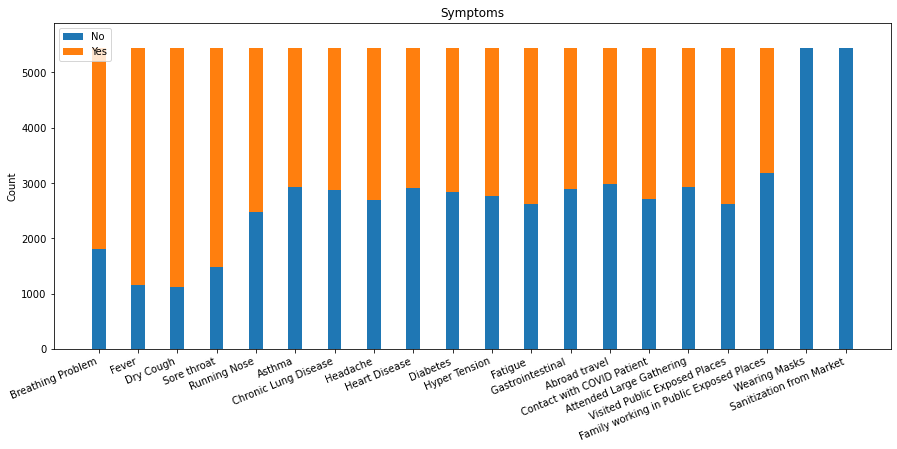

In [30]:
fig, ax = plt.subplots(figsize=(15,6))

ax.bar(x =cvdf.iloc[:, :20].columns, 
       height=cvdf[cvdf == 'No'].count()[:-1], 
       width=0.35, 
       label='No')
ax.bar(x =cvdf.iloc[:, :20].columns, 
       height=cvdf[cvdf == 'Yes'].count()[:-1], 
       width=0.35, 
       label='Yes', 
       bottom=cvdf[cvdf == 'No'].count()[:-1])

#ax.set_xticklabels(cvdf.iloc[:, :20].columns, rotation = 45)
ax.set_ylabel('Count')
ax.set_title('Symptoms')
ax.legend()
plt.ylim(0, 5900)
plt.xticks(range(20), cvdf.iloc[:, :20].columns, rotation=22.5, ha='right')
plt.show()


## Preprocessing

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cvdf.iloc[:, :20], 
                                                    cvdf.iloc[:, 20], 
                                                    test_size = 0.3, 
                                                    random_state = 42)

In [28]:
enc = OrdinalEncoder() 
enc.fit(X_train)
X_train_enc = enc.transform(X_train)
X_test_enc = enc.transform(X_test)

lb = LabelBinarizer()
y_train_enc = lb.fit_transform(y_train)
y_test_enc = lb.fit_transform(y_test)


## Modeling: Decision Tree

In [31]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

clf = clf.fit(X_train_enc, y_train_enc)

accuracy = clf.score(X_test_enc, y_test_enc)
accuracy

0.9822194972409565

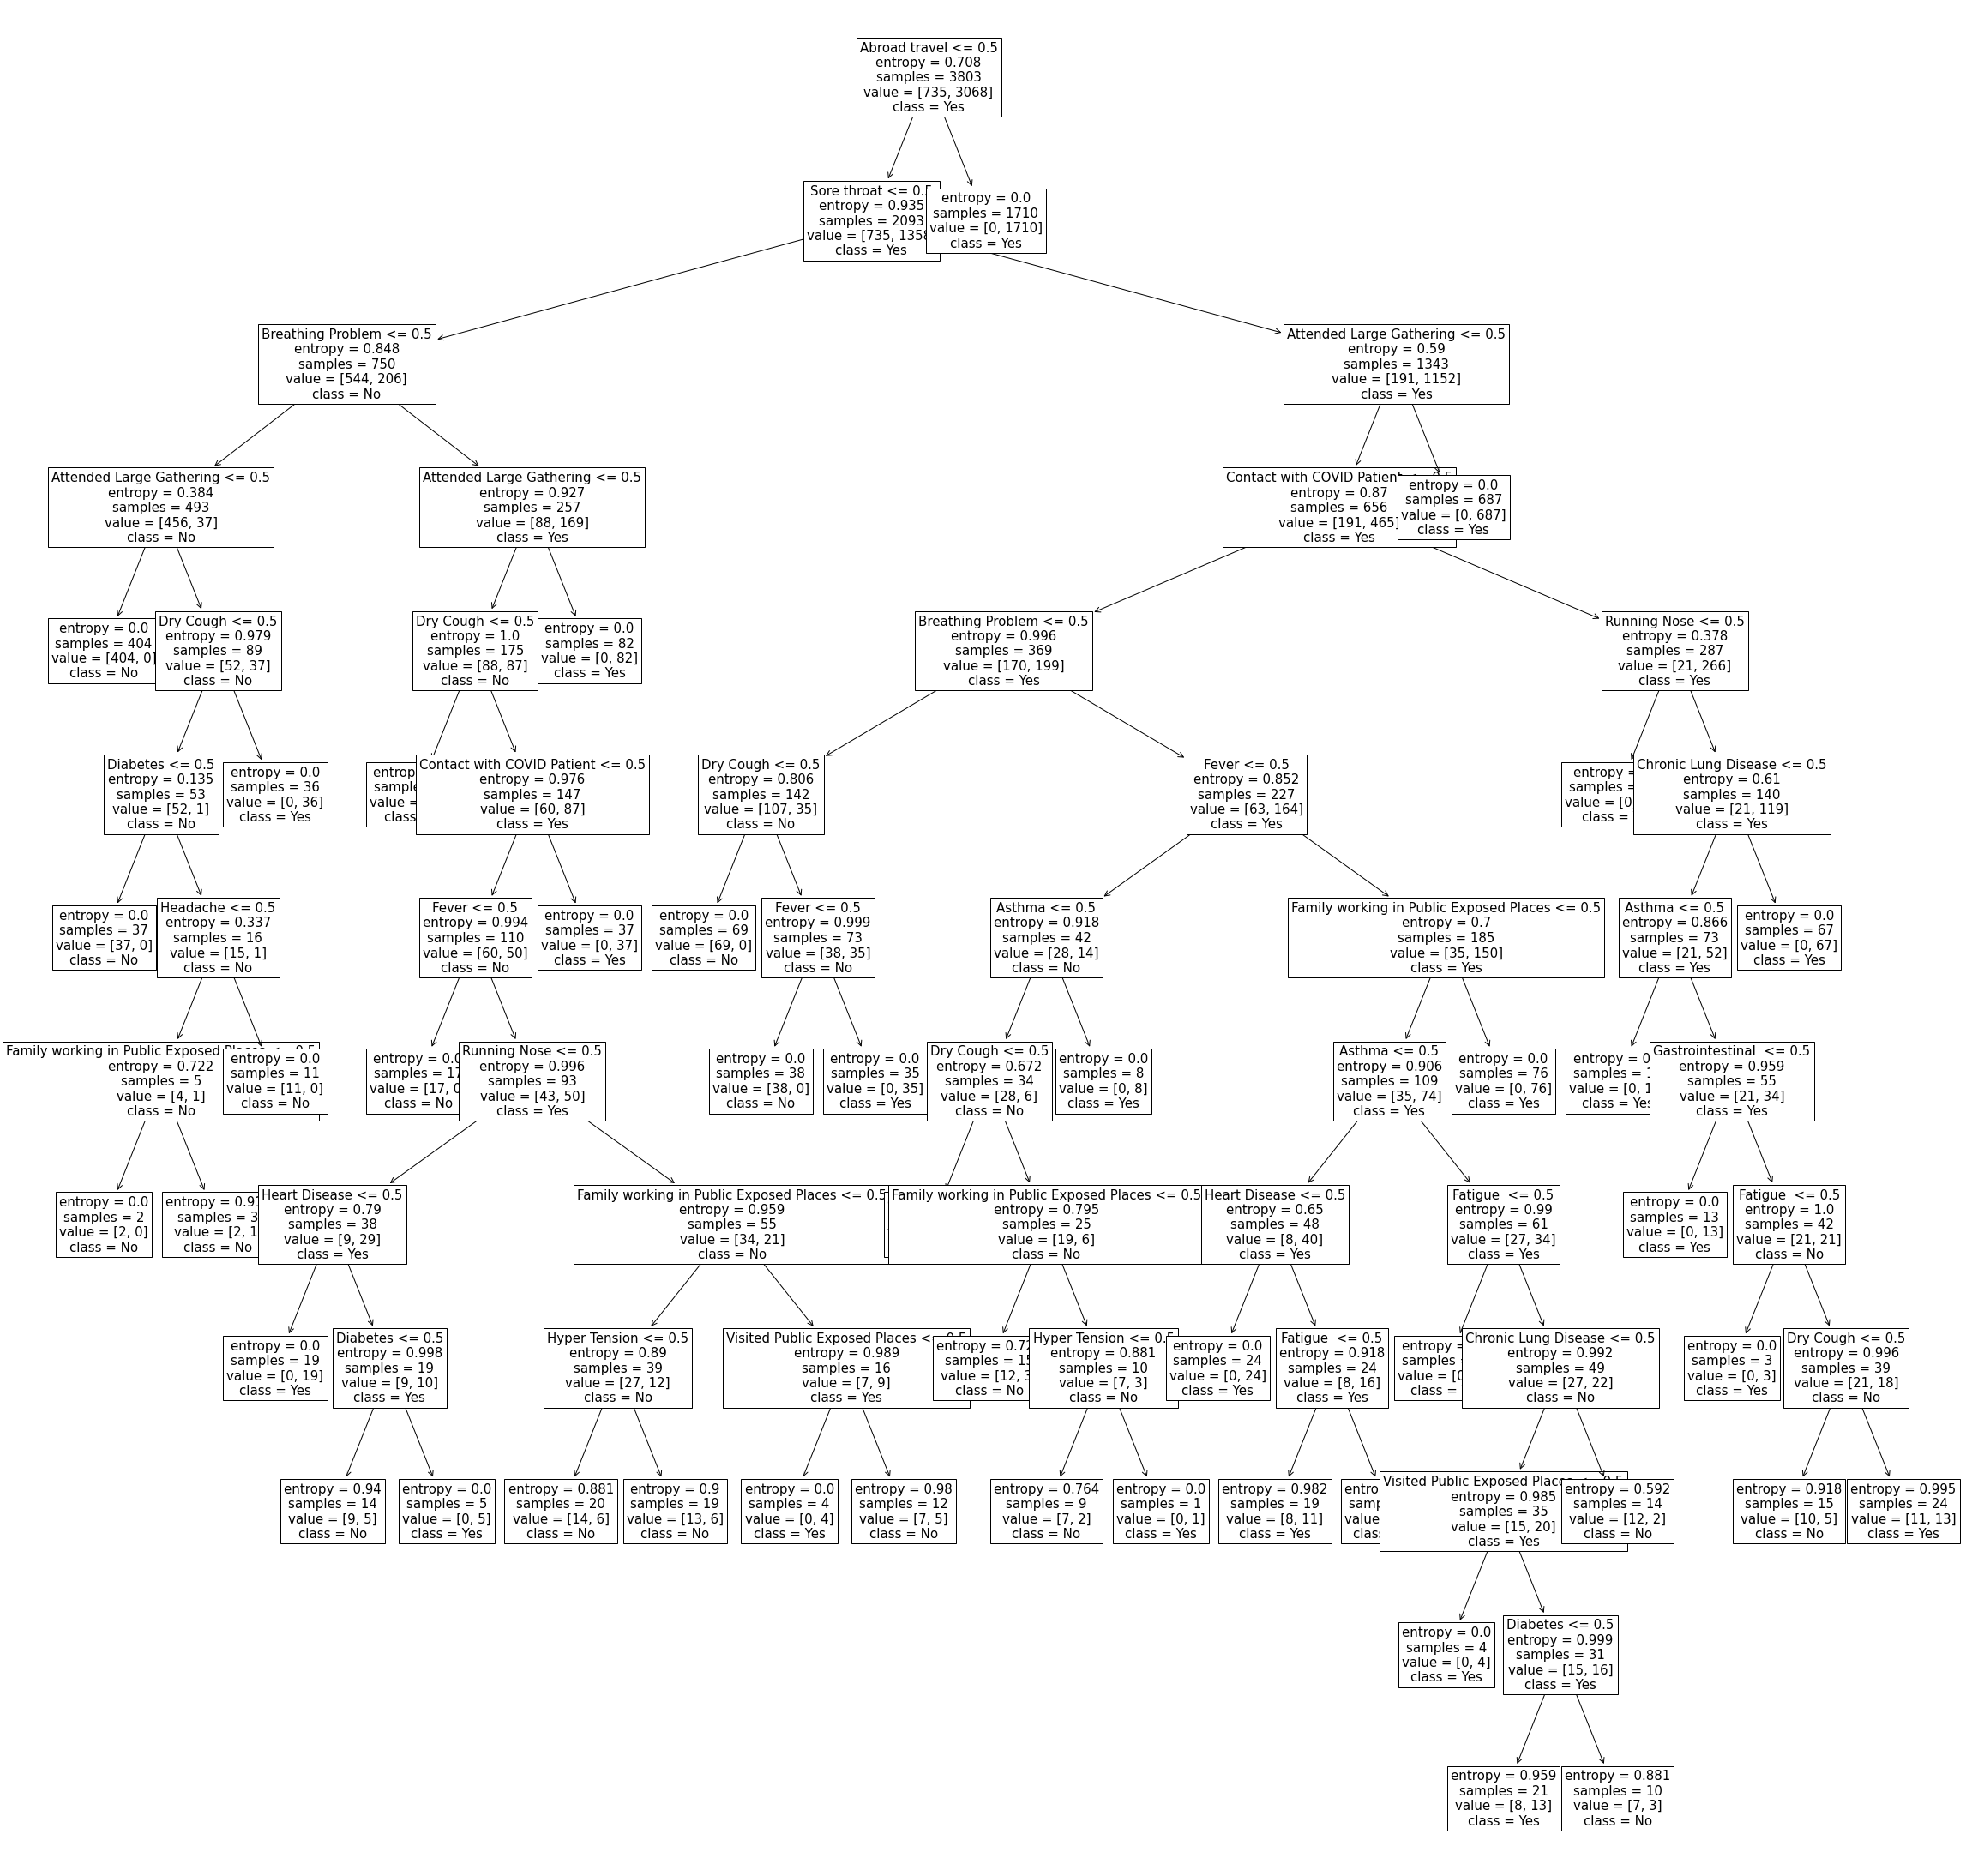

In [32]:
plt.figure(figsize=(40,40))

tree.plot_tree(clf, 
               feature_names=enc.feature_names_in_,
               class_names=['No', 'Yes'], 
               fontsize=15);

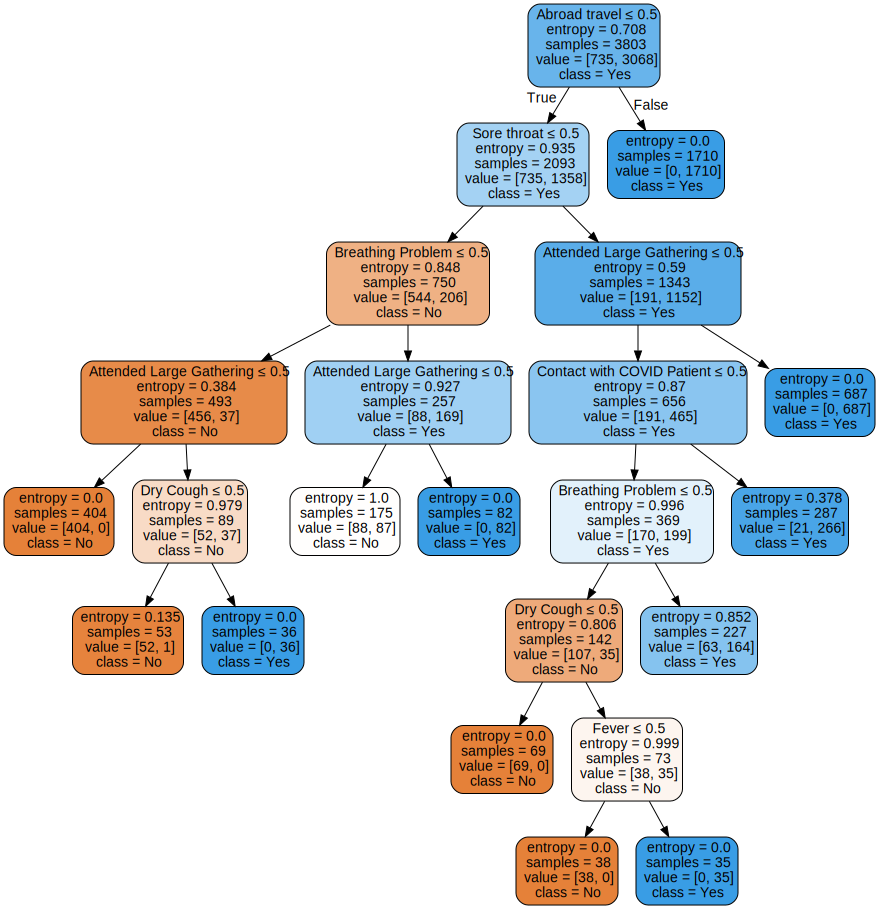

In [171]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names= enc.feature_names_in_,# enc.get_feature_names_out(list(cvdf.iloc[:, :20].columns)), 
                                class_names=['No', 'Yes'], 
                                filled=True, rounded=True, 
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [174]:
graph.render("covid_proj1")

'covid_proj1.pdf'

In [187]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']

print(classification_report(np.ravel(y_train_enc), clf.predict(X_train_enc), target_names=target_names))

              precision    recall  f1-score   support

          No       0.88      0.89      0.88       735
         Yes       0.97      0.97      0.97      3068

    accuracy                           0.95      3803
   macro avg       0.93      0.93      0.93      3803
weighted avg       0.95      0.95      0.95      3803



### Example of user that does not fit model prediction

In [188]:
cvdf[(cvdf['Abroad travel'] == 'No') & 
     (cvdf['Sore throat'] == 'No') & 
     (cvdf['Breathing Problem'] == 'No') &
     (cvdf['Attended Large Gathering'] == 'Yes') &
     (cvdf['Dry Cough'] == 'No') &
     (cvdf['COVID-19'] == 'Yes')]

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
4074,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,No,Yes,Yes,No,Yes,No,No,Yes
